In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import warnings
import collections
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [4]:
data = pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
net_movie = data.loc[data.type == 'Movie',:].reset_index()
net_movie.title = net_movie.title.str.lower()
net_movie['index'] = net_movie.index
net_movie.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,2,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,3,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,4,s13,Movie,je suis karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [6]:
tv_shows = data.loc[data['type'] == 'TV Show'].reset_index()
tv_shows.title = tv_shows.title.str.lower()
tv_shows['index'] = tv_shows.index
tv_shows

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s2,TV Show,blood & water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,1,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,2,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
3,3,s5,TV Show,kota factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,4,s6,TV Show,midnight mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,2671,s8796,TV Show,yu-gi-oh! arc-v,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
2672,2672,s8797,TV Show,yunus emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
2673,2673,s8798,TV Show,zak storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
2674,2674,s8801,TV Show,zindagi gulzar hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [9]:
net_movie.duplicated().sum()
tv_shows.duplicated().sum()

0

In [10]:
index = tv_shows.index
number_of_rows_tv = len(index)

In [11]:
index = net_movie.index
number_of_rows_movie = len(index)

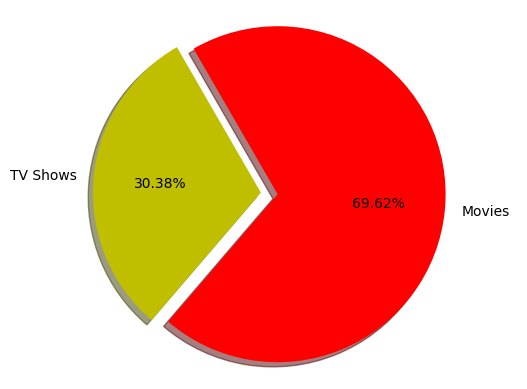

In [12]:
color = ['y', 'r']
label = 'TV Shows' , 'Movies'
sizes = [number_of_rows_tv, number_of_rows_movie]
explode = (0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=label, colors=color,autopct='%2.2f%%',shadow=True, startangle=120)
ax1.axis('equal')
plt.show()

List of latest movies

In [13]:
top_15 = net_movie.sort_values(by='release_year', ascending=False).head(15)
top_15[["title","release_year"]]

,title,release_year
362,dynasty warriors,2021
484,myriam fares: the journey,2021
481,alan saldaña: locked up,2021
480,xtreme,2021
479,trippin' with the kandasamys,2021
478,sweet & sour,2021
475,breaking boundaries: the science of our planet,2021
473,kitty love: an homage to cats,2021
470,tragic jungle,2021
468,awake,2021


Category with maximum content

<AxesSubplot: ylabel='listed_in'>

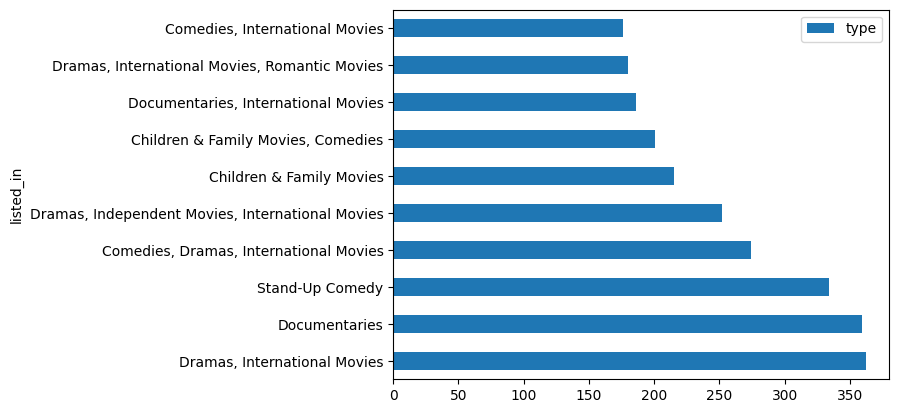

In [20]:
newdata = net_movie
new = newdata.groupby('listed_in').count()
category = new.sort_values(by = 'index',ascending = False).head(10)
category1 = category[["type"]]
category1.plot(kind="barh")

In [21]:
net_movie.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'],
      dtype='object')

In [22]:
features = ['director','cast','country','description','listed_in']

In [23]:
for feature in features:
    net_movie[feature] = net_movie[feature].fillna('')
def combine_features(row):
    return row['director'] + " " + row['cast'] + " " + row["country"] + " " + row["description"] + " " + row["listed_in"]
net_movie["combined_features"] = net_movie.apply(combine_features,axis=1)
print("Combine Feature:",net_movie["combined_features"])

Combine Feature: 0       Kirsten Johnson  United States As her father n...
1       Robert Cullen, José Luis Ucha Vanessa Hudgens,...
2       Haile Gerima Kofi Ghanaba, Oyafunmike Ogunlano...
3       Theodore Melfi Melissa McCarthy, Chris O'Dowd,...
4       Christian Schwochow Luna Wedler, Jannis Niewöh...
                              ...                        
6126    Majid Al Ansari Ali Suliman, Saleh Bakri, Yasa...
6127    David Fincher Mark Ruffalo, Jake Gyllenhaal, R...
6128    Ruben Fleischer Jesse Eisenberg, Woody Harrels...
6129    Peter Hewitt Tim Allen, Courteney Cox, Chevy C...
6130    Mozez Singh Vicky Kaushal, Sarah-Jane Dias, Ra...
Name: combined_features, Length: 6131, dtype: object


In [24]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(net_movie["combined_features"])
cosine_sim = cosine_similarity(count_matrix)

In [25]:
def title_from_index(index):
    return net_movie[net_movie.index == index]["title"].values[0]
    

In [26]:
def title_from_index(df, index):
    return df[df.index == index]["title"].values[0]
    

In [27]:
def index_from_title(df, title):
    return df[df.title == title]["index"].values[0]

In [28]:
def selectmovie(movie_user_likes):
    try:
        movie_user_likes = movie_user_likes.lower()
        movie_index = index_from_title(net_movie, movie_user_likes)
        similar_movies = list(enumerate(cosine_sim[movie_index]))
        sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]
        i=0
        print("Top 5 similar movies to "+movie_user_likes+" are:\n")
        for element in sorted_similar_movies:
            print(title_from_index(net_movie,element[0]))
            i = i + 1
            if i >= 5:
                break
    except:
        print("Movie not found")

In [34]:
selectmovie('Inception')

Top 5 similar movies to inception are:

9
dragonheart: a new beginning
the world is not enough
mars attacks!
apollo 18
